<a href="https://colab.research.google.com/github/abdool-sp/Data-Analyst-Portfolio/blob/main/Child_Abuse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Child Abuse: Insights from the BuzzFeed Dataset.

**Project Objective:** The objective of this project is to gain insights and understand patterns related to child abuse incidents through exploratory analysis of the BuzzFeed dataset which includes data from 2010 to 2020.

**Dataset Description:** The primary dataset used in this project contains data from 2010 to 2020. It includes child abuse cases grouped in to year,race,county and state. This dataset can be found in the BuzzFeed Github [repo](https://github.com/BuzzFeedNews/2022-04-registries/tree/main/data/national)

**Tools Used:** The Tool used in this project is purely python with the google colab IDE. matplotlib library was used for visualization.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.set_printoptions(precision=2)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2022-04-registries/main/data/national/county_B03002.csv')
df.head()

,fips,name,total,non_hispanic,white,black,native,asian,pac,other,two,hispanic,year,state,county
0,0500000US01001,"Autauga County, Alabama",55380,53815,41315,10524,140,573,5,85,1173,1565,2019,Alabama,Autauga
1,0500000US01003,"Baldwin County, Alabama",212830,203119,176803,19525,1391,1955,9,344,3092,9711,2019,Alabama,Baldwin
2,0500000US01005,"Barbour County, Alabama",25361,24256,11618,12031,74,121,1,107,304,1105,2019,Alabama,Barbour
3,0500000US01007,"Bibb County, Alabama",22493,21914,16763,4981,30,27,0,0,113,579,2019,Alabama,Bibb
4,0500000US01009,"Blount County, Alabama",57681,52339,50121,881,40,212,25,214,846,5342,2019,Alabama,Blount


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35425 entries, 0 to 35424
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fips          35425 non-null  object
 1   name          35425 non-null  object
 2   total         35425 non-null  int64 
 3   non_hispanic  35425 non-null  int64 
 4   white         35425 non-null  int64 
 5   black         35425 non-null  int64 
 6   native        35425 non-null  int64 
 7   asian         35425 non-null  int64 
 8   pac           35425 non-null  int64 
 9   other         35425 non-null  int64 
 10  two           35425 non-null  int64 
 11  hispanic      35425 non-null  int64 
 12  year          35425 non-null  int64 
 13  state         35425 non-null  object
 14  county        35425 non-null  object
dtypes: int64(11), object(4)
memory usage: 4.1+ MB


In [5]:
df['total'] /= 1000
df['hispanic'] /= 1000
df['white'] /= 1000
df['non_hispanic'] /= 1000
df['black'] /= 1000
df['native'] /= 1000
df['asian'] /= 1000
df['pac'] /= 1000
df['other'] /= 1000
df['two'] /= 1000

df.head()

,fips,name,total,non_hispanic,white,black,native,asian,pac,other,two,hispanic,year,state,county
0,0500000US01001,"Autauga County, Alabama",55.380,53.815,41.315,10.524,0.140,0.573,0.005,0.085,1.173,1.565,2019,Alabama,Autauga
1,0500000US01003,"Baldwin County, Alabama",212.830,203.119,176.803,19.525,1.391,1.955,0.009,0.344,3.092,9.711,2019,Alabama,Baldwin
2,0500000US01005,"Barbour County, Alabama",25.361,24.256,11.618,12.031,0.074,0.121,0.001,0.107,0.304,1.105,2019,Alabama,Barbour
3,0500000US01007,"Bibb County, Alabama",22.493,21.914,16.763,4.981,0.030,0.027,0.000,0.000,0.113,0.579,2019,Alabama,Bibb
4,0500000US01009,"Blount County, Alabama",57.681,52.339,50.121,0.881,0.040,0.212,0.025,0.214,0.846,5.342,2019,Alabama,Blount


In [6]:
df.shape

(35425, 15)

There are 35425 rows in the dataset.

In [35]:
df.describe()

,total,non_hispanic,white,black,native,asian,pac,other,two,hispanic,year
count,35425.000000,35425.000000,35425.000000,35425.000000,35425.000000,35425.000000,35425.000000,35425.000000,35425.000000,35425.000000,35425.000000
mean,99.214825,81.366100,61.176215,12.024485,0.647215,4.979557,0.156105,0.219886,2.162637,17.848725,2014.999746
std,318.103097,218.650434,141.309227,52.764035,2.844475,37.804501,1.820521,1.212563,8.044051,119.460568,3.162452
min,0.041000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
25%,11.226000,9.316000,7.666000,0.077000,0.020000,0.025000,0.000000,0.000000,0.114000,0.304000,2012.000000
50%,26.011000,22.932000,19.255000,0.661000,0.086000,0.121000,0.000000,0.010000,0.346000,1.049000,2015.000000
75%,66.415000,60.873000,51.959000,5.097000,0.333000,0.653000,0.026000,0.071000,1.250000,5.179000,2018.000000
max,10105.722000,5212.143000,2772.785000,1289.020000,70.012000,1467.279000,90.905000,47.002000,259.209000,4893.603000,2020.000000


In [8]:
df.isnull().sum()

fips            0
name            0
total           0
non_hispanic    0
white           0
black           0
native          0
asian           0
pac             0
other           0
two             0
hispanic        0
year            0
state           0
county          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [28]:
df['year'].unique()

array([2019, 2018, 2020, 2014, 2010, 2011, 2015, 2012, 2016, 2017, 2013])

In [30]:
df['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [33]:
df['county'].value_counts()

Washington                  330
Jefferson                   275
Franklin                    264
Lincoln                     253
Jackson                     253
                           ... 
Bedford city                  4
La Salle Parish               2
Chugach Census Area           1
Copper River Census Area      1
Do?a Ana                      1
Name: county, Length: 1962, dtype: int64

This data is collected over 1962 counties in the county.

In [10]:
#Average child abuse of each race each year
df.groupby(df['year']).mean()

<ipython-input-10-959b51b71b10>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['year']).mean()


,total,non_hispanic,white,black,native,asian,pac,other,two,hispanic
year,,,,,,,,,,
2010,95.537906,79.566343,61.038964,11.526494,0.636086,4.354200,0.142441,0.213620,1.654538,15.971563
2011,96.350934,79.923266,61.087625,11.628052,0.636198,4.450599,0.145691,0.203878,1.771223,16.427667
2012,97.129909,80.296266,61.140421,11.732452,0.636709,4.562310,0.149054,0.191873,1.883447,16.833643
2013,97.863881,80.654993,61.185431,11.827766,0.640129,4.676754,0.151722,0.188740,1.984452,17.208888
2014,98.678897,81.078893,61.237601,11.945228,0.646853,4.825620,0.153171,0.190543,2.079876,17.600004
2015,99.409346,81.465404,61.268068,12.046128,0.645556,4.986460,0.155151,0.198785,2.165256,17.943942
2016,100.027189,81.800085,61.301016,12.143207,0.647334,5.101766,0.158078,0.210472,2.238212,18.227103
2017,100.768127,82.152232,61.274598,12.250998,0.651816,5.276946,0.160117,0.222793,2.314965,18.615895
2018,101.332289,82.429409,61.245091,12.335101,0.663211,5.394257,0.163089,0.235026,2.393635,18.902880


In [11]:
total_by_year = df['total'].groupby(df['year']).sum().sort_values(ascending=True)

diff = []
perc_diff = []
for i in range(len(total_by_year)-1):
  diff_ = round(total_by_year.iloc[i+1] - total_by_year.iloc[i],2)
  perc_diff_ = round(((total_by_year.iloc[i+1] - total_by_year.iloc[i])/total_by_year.iloc[i]) * 100,2)
  diff.append(diff_)
  perc_diff.append(perc_diff_)

diff = np.array(diff)
perc_diff = np.array(perc_diff)

avg_diff = diff.mean()
avg_perc_diff = round(perc_diff.mean(),2)

print("Each year from 2010 to 2019, Child abuse cases increases with an average number of ", avg_diff)
print("Each year from 2010 to 2019, Child abuse cases increases averagely by {} percent".format(avg_perc_diff))

Each year from 2010 to 2019, Child abuse cases increases with an average number of  2209.734
Each year from 2010 to 2019, Child abuse cases increases averagely by 0.7 percent


In [12]:
perc_diff

array([0.85, 0.81, 0.76, 0.8 , 0.74, 0.62, 0.74, 0.56, 0.53, 0.55])

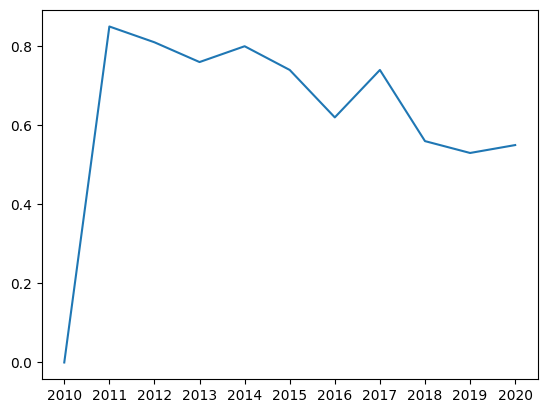

In [40]:
plt.figure()
plt.plot(["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020",],np.insert(perc_diff,0, 0))
plt.show()

It can be seen that there's a sharp increase in child abuse cases in almost every year. The average at which it increases is by 2,210 cases in each year. So by 2010 to 2020 we have approximately 19,890 less cases. The exact value is 22,097 as seen below

In [44]:
(df['total'].groupby(df['year']).sum()[2020] - df['total'].groupby(df['year']).sum()[2010])

22097.35600000003

In [41]:
#df['total'].groupby(df['year']).sum().plot(kind='line')
df['total'].groupby(df['year']).sum()

year
2010    307727.594
2011    310346.358
2012    312855.438
2013    315219.560
2014    317746.049
2015    320098.094
2016    322087.547
2017    324473.370
2018    326289.971
2019    328016.242
2020    329824.950
Name: total, dtype: float64


Now let's see:
1.   In which state do black people have cases the most in each year
2.   In which state do white people have cases the most in each year






In [14]:
q = df['black'].groupby([df['year'],df['state']]).sum().sort_values(ascending=False)
years = df['year'].unique()
states = []
no_of_cases = []
for year in years:
  states.append(q[year].head(1).index[0])
  no_of_cases.append(q[year].head(1).iloc[0])

black_df = pd.DataFrame({
    'year': years,
    'state': states,
    'cases': no_of_cases

})

black_df.sort_values(by="year").reset_index(drop=True)

,year,state,cases
0,2010,Georgia,2843.662
1,2011,Georgia,2887.601
2,2012,Georgia,2932.160
3,2013,Georgia,2970.755
4,2014,Texas,3015.767
5,2015,Texas,3070.821
6,2016,Texas,3134.962
7,2017,Texas,3199.022
8,2018,Texas,3269.253
9,2019,Texas,3328.707


In [15]:
w = df['white'].groupby([df['year'],df['state']]).sum().sort_values(ascending=False)
years = df['year'].unique()
states = []
no_of_cases = []
for year in years:
  states.append(w[year].head(1).index[0])
  no_of_cases.append(w[year].head(1).iloc[0])

white_df = pd.DataFrame({
    'state': states,
    'cases': no_of_cases,
    'years':years

})

white_df.sort_values(by='cases',ascending=False).reset_index(drop=True)

,state,cases,years
0,California,15107.042,2010
1,California,15028.200,2011
2,California,14977.510,2012
3,California,14937.880,2013
4,California,14905.601,2014
5,California,14879.258,2015
6,California,14837.242,2016
7,California,14777.594,2017
8,California,14695.836,2018
9,California,14605.312,2019


<Axes: title={'center': 'total'}, xlabel='year'>

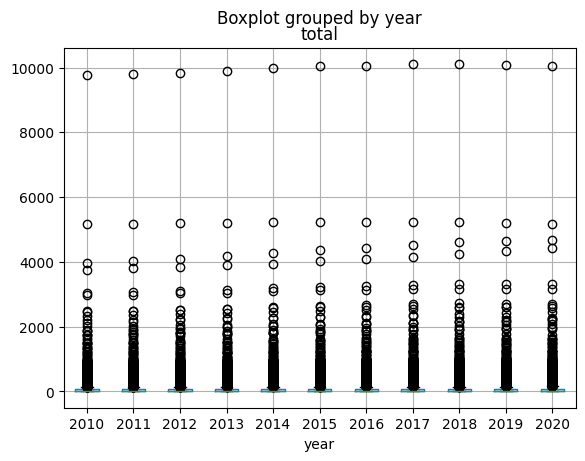

In [16]:
grp_total = df.groupby(df['year'])['total'].sum()
df.boxplot(by='year',column='total')
#there are some outliers in each year

##Note
Even though, Texas has the most reported cases for black people, the population of white people and child abuses related to white people is still greater in the state of Texas. Where as in California, White people are dominant

In [17]:
#white cases in texas
df.loc[(df['state'] =='Texas') & (df['year'] == 2019),"white"].sum()

11856.336

The BuzzFeed News analysis shows that nearly two-thirds of all people appealing the state’s findings were successful in Pennsylvania and New Jersey across 10 years of data. In recent years, the rates were much higher — as high as 74% in New Jersey in 2019.
[article](https://www.buzzfeednews.com/article/scottpham/child-abuse-and-neglect-registries-punish-parents-of-color)

**Let's confirm that**



In [18]:
nj_df = pd.read_excel("https://github.com/BuzzFeedNews/2022-04-registries/blob/main/data/states/new_jersey/Appeal%20Outcomes%20-%202010%20to%202020%20-%20Final.xlsx?raw=true",
                      skiprows = 4)
nj_df.head()

,ALLEGATION,ALJ affirmed,ALJ overturned,ALJ affirmed.1,ALJ overturned.1,TOTAL Substantiations affirmed,Unnamed: 6,Unnamed: 7,TOTAL Findings modified,TOTAL
0,Abuse,2,1,2,NaN,5,0,1,1,6
1,Abuse and Neglect,3,NaN,5,1,9,1,1,2,11
2,Educational Neglect,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0
3,Emotional & Physical Abuse,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0
4,Emotional Abuse,2,NaN,2,NaN,4,1,NaN,1,5


In [19]:
rename_cols = {
    'ALJ affirmed': "affirmed_counsel",
    'ALJ overturned': "overturned_counsel",
    'ALJ affirmed.1': "affirmed_self",
    'ALJ overturned.1' : "overturned_self",
    'TOTAL Substantiations affirmed':"sub_total_affirmed",
    'Unnamed: 6':"mod_counsel",
    'Unnamed: 7':"mod_self",
    'TOTAL Findings modified':"mod_total",
    'TOTAL': "total_appeals"
}
nj_df.rename(columns=rename_cols,inplace=True)

In [20]:
nj_df.iloc[232]

ALLEGATION            No Data Available
affirmed_counsel                    NaN
overturned_counsel                  NaN
affirmed_self                       NaN
overturned_self                     NaN
sub_total_affirmed                    0
mod_counsel                         NaN
mod_self                            NaN
mod_total                             0
total_appeals                         0
Name: 232, dtype: object

In [21]:
def get_year(rn):
  if rn in list(range(14)):
    return 2010
  if rn in list(range(23,37)):
    return 2011
  if rn in list(range(44,58)):
    return 2012
  if rn in list(range(65,79)):
    return 2013
  if rn in list(range(87,101)):
    return 2014
  if rn in list(range(109,123)):
    return 2015
  if rn in list(range(131,146)):
    return 2016
  if rn in list(range(153,167)):
    return 2017
  if rn in list(range(176,190)):
    return 2018
  if rn in list(range(197,211)):
    return 2019
  if rn in list(range(219,233)):
    return 2020
  else:
    return 0




nj_df.head()

,ALLEGATION,affirmed_counsel,overturned_counsel,affirmed_self,overturned_self,sub_total_affirmed,mod_counsel,mod_self,mod_total,total_appeals
0,Abuse,2,1,2,NaN,5,0,1,1,6
1,Abuse and Neglect,3,NaN,5,1,9,1,1,2,11
2,Educational Neglect,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0
3,Emotional & Physical Abuse,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0
4,Emotional Abuse,2,NaN,2,NaN,4,1,NaN,1,5


In [22]:
def add_year(row):
  year = get_year(row.name)
  if year is None:
    return year
  if row.name is None:
    print(row.index)
  return int(year)


nj_df['Year'] = nj_df.apply(add_year,axis=1)
nj_df.tail()

,ALLEGATION,affirmed_counsel,overturned_counsel,affirmed_self,overturned_self,sub_total_affirmed,mod_counsel,mod_self,mod_total,total_appeals,Year
230,Sexual Abuse,5,NaN,5,NaN,10,7,NaN,7,17,2020
231,Sexual Abuse & Neglect,NaN,NaN,NaN,NaN,0,1,NaN,1,1,2020
232,No Data Available,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,2020
233,Total,6,0,14,0,20,22,4,26,46,0
234,*An additional 37 appeals transmitted to the O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [23]:
years = {}
years["2010"] = nj_df.loc[0:13]
years["2011"] = nj_df.loc[23:36]
years["2012"] = nj_df.loc[44:57]
years["2013"] = nj_df.loc[65:78]
years["2014"] = nj_df.loc[87:100]
years["2015"] = nj_df.loc[109:122]
years["2016"] = nj_df.loc[131:145]
years["2017"] = nj_df.loc[153:166]
years["2018"] = nj_df.loc[176:189]
years["2019"] = nj_df.loc[197:210]
years["2020"] = nj_df.loc[219:232]

transmitted_df = (pd.concat([dfs[1] for dfs in years.items()]))
cols = transmitted_df.columns
for col in cols[1:]:
  transmitted_df[col] = pd.to_numeric(transmitted_df[col])

transmitted_df.head()

,ALLEGATION,affirmed_counsel,overturned_counsel,affirmed_self,overturned_self,sub_total_affirmed,mod_counsel,mod_self,mod_total,total_appeals,Year
0,Abuse,2.0,1.0,2.0,NaN,5.0,0.0,1.0,1.0,6.0,2010
1,Abuse and Neglect,3.0,NaN,5.0,1.0,9.0,1.0,1.0,2.0,11.0,2010
2,Educational Neglect,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,2010
3,Emotional & Physical Abuse,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,2010
4,Emotional Abuse,2.0,NaN,2.0,NaN,4.0,1.0,NaN,1.0,5.0,2010


In [24]:
ntransmitted_df = pd.read_excel("https://github.com/BuzzFeedNews/2022-04-registries/blob/main/data/states/new_jersey/Appeal%20Outcomes%20-%202010%20to%202020%20-%20Final.xlsx?raw=true",
                      sheet_name=1,
                      usecols="D,G",
                      skiprows = 4,
                      names=["year","count"]).dropna()
ntransmitted_df

,year,count
0,2010.0,1276.0
1,2011.0,1317.0
2,2012.0,1336.0
3,2013.0,1158.0
4,2014.0,846.0
5,2015.0,661.0
6,2016.0,592.0
7,2017.0,499.0
8,2018.0,493.0
9,2019.0,518.0


In [25]:
cols = [
    "allegation",
    "affirmed", # agency affirms original decision, appellant has counsel
    "affirmed_nc", # agency affirms, no counsel
    "withdrawn", # agency affirms b/c appellant withdraws, counsel
    "withdrawn_nc", # agency affirms, no counsel
    "review", # agency affirms through written record review, counsel
    "review_nc", # agency affirms, no counsel
    "pre_reviewed", # agency affirms through previous written review, counsel
    "pre_reviewed_nc", # agency affirms, no counsel
    "forum", # case is in another forum, agency affirms, counsel
    "forum_nc", # agency affirms, no counsel
    "decided", # case was already decided by judge, agency affirms, counsel
    "decided_nc", # agency affirms, no counsel
    "modified", # agency reverses, counsel
    "modified_nc", # agency reverses, no counsel,
    "no_perp", # appellant isn't the perpetrator, agency affirms, counsel
    "no_perp_nc", # agency affirms, counsel
    "moot_nc", # agency affirms, no counsel
    "total_appeals"
]

oc_df = pd.read_excel("https://github.com/BuzzFeedNews/2022-04-registries/blob/main/data/states/new_jersey/Appeal%20Outcomes%20-%202010%20to%202020%20-%20Final.xlsx?raw=true",
                      sheet_name=2,
                      usecols="B:T",
                      skiprows = 5,
                      names=cols).fillna(0)
oc_df.head()

,allegation,affirmed,affirmed_nc,withdrawn,withdrawn_nc,review,review_nc,pre_reviewed,pre_reviewed_nc,forum,forum_nc,decided,decided_nc,modified,modified_nc,no_perp,no_perp_nc,moot_nc,total_appeals
0,Abuse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abuse and Neglect,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Educational Neglect,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Emotional & PhysicalAbuse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Emotional Abuse,0,0,0,0,0,0,0,0,2,0,0,0,1,3,0,0,0,6


In [26]:
yearoc = {}
yearoc["2020"] = oc_df.loc[0:15]
yearoc["2019"] = oc_df.loc[25:40]
yearoc["2018"] = oc_df.loc[49:65]
yearoc["2017"] = oc_df.loc[74:90]
yearoc["2016"] = oc_df.loc[101:116]
yearoc["2015"] = oc_df.loc[125:140]
yearoc["2014"] = oc_df.loc[151:166]
yearoc["2013"] = oc_df.loc[176:191]
yearoc["2012"] = oc_df.loc[202:217]
yearoc["2011"] = oc_df.loc[227:242]
yearoc["2010"] = oc_df.loc[251:266]

def add_year(item):
  return item[1].assign(year = item[0])

outcomes_df = pd.concat([add_year(df) for df in yearoc.items()])

cols = outcomes_df.columns
for col in cols[1:]:
  outcomes_df[col] = pd.to_numeric(outcomes_df[col])

outcomes_df.head()

,allegation,affirmed,affirmed_nc,withdrawn,withdrawn_nc,review,review_nc,pre_reviewed,pre_reviewed_nc,forum,forum_nc,decided,decided_nc,modified,modified_nc,no_perp,no_perp_nc,moot_nc,total_appeals,year
0,Abuse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020
1,Abuse and Neglect,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020
2,Educational Neglect,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020
3,Emotional & PhysicalAbuse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020
4,Emotional Abuse,0,0,0,0,0,0,0,0,2,0,0,0,1,3,0,0,0,6,2020


In [27]:
percent_success = pd.DataFrame()

trs_year = transmitted_df.select_dtypes(include='number').groupby(transmitted_df['Year']).sum()
ntrs_year = outcomes_df.select_dtypes(include='number').groupby(outcomes_df['year']).sum()


# non-transmissals minus technical disqualifications i.e removing stuff like pre reviewed and others
total = ntrs_year[["affirmed",
            "affirmed_nc",
            "withdrawn",
            "withdrawn_nc",
            "review",
            "review_nc",
            "modified",
            "modified_nc"]].sum(axis=1)

npercent_success = pd.DataFrame()
npercent_success['transmitted'] = trs_year['mod_total']/trs_year['total_appeals']
npercent_success['not_transmitted'] = ntrs_year['modified']/total
npercent_success['totals'] = trs_year['total_appeals'] + total
npercent_success['total_successfull_apeals'] = trs_year['mod_total'] + ntrs_year['modified'] + ntrs_year['modified_nc']
npercent_success['percent_success'] = (npercent_success['total_successfull_apeals']/npercent_success['totals'])*100
npercent_success

,transmitted,not_transmitted,totals,total_successfull_apeals,percent_success
Year,,,,,
2010,0.275689,0.116279,1001.0,606.0,60.539461
2011,0.343490,0.111782,1023.0,629.0,61.485826
2012,0.311953,0.057402,1005.0,646.0,64.278607
2013,0.648276,0.111693,718.0,568.0,79.108635
2014,0.355705,0.080952,569.0,407.0,71.528998
2015,0.406667,0.114198,474.0,346.0,72.995781
2016,0.333333,0.096667,459.0,288.0,62.745098
2017,0.441176,0.073801,407.0,269.0,66.093366
2018,0.549020,0.071970,417.0,284.0,68.105516


It can be seen from the above result that the article quoted earlier is indeed correct that the successful apeals in 2019 is as high as 74% approximately.

## Conclusion
Even though cases have been rising through out the years, it cannot be concluded that people are being more careless with their kids. This is why the percentage of successful apeals in New Jersey is quite high. In fact the basis of the quoted buzzfeed article tried to make the case that system is flawed in reporting child abuse cases. In the future, more analysis need to done per the individual state in order to understand the necessary factors.